In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import time
from subprocess import check_output
from sklearn.svm import SVC
from sklearn import preprocessing
import random
import itertools



import os
for dirname, _, filenames in os.walk('data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df.describe(include='all').loc['count']

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
Unnamed:

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
#Distribution of Radius Mean for Bening and Malignant Tumors

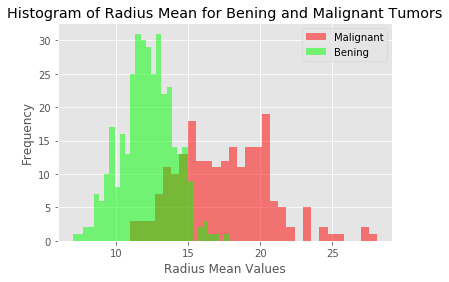

Most frequent malignant radius mean is:  20.101999999999997


In [9]:
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

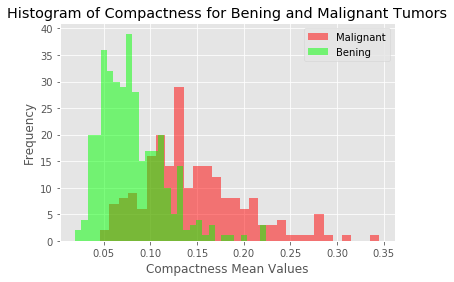

Most frequent malignant compactness mean is:  20.101999999999997


In [11]:
m_compactness = plt.hist(df[df["diagnosis"] == "M"].compactness_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b_compactness = plt.hist(df[df["diagnosis"] == "B"].compactness_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Compactness Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Compactness for Bening and Malignant Tumors")
plt.show()
frequent_malignant_compactness_mean = m[0].max()
index_frequent_malignant_compactness_mean = list(m[0]).index(frequent_malignant_compactness_mean)
most_frequent_malignant_compactness_mean = m[1][index_frequent_malignant_compactness_mean]
print("Most frequent malignant compactness mean is: ",most_frequent_malignant_compactness_mean)

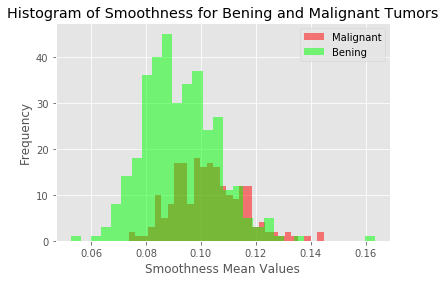

Most frequent malignant smoothness mean is:  20.101999999999997


In [12]:
m_smoothness = plt.hist(df[df["diagnosis"] == "M"].smoothness_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b_smoothness = plt.hist(df[df["diagnosis"] == "B"].smoothness_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Smoothness Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Smoothness for Bening and Malignant Tumors")
plt.show()
frequent_malignant_smoothness_mean = m[0].max()
index_frequent_malignant_smoothness_mean = list(m[0]).index(frequent_malignant_smoothness_mean)
most_frequent_malignant_smoothness_mean = m[1][index_frequent_malignant_smoothness_mean]
print("Most frequent malignant smoothness mean is: ",most_frequent_malignant_smoothness_mean)

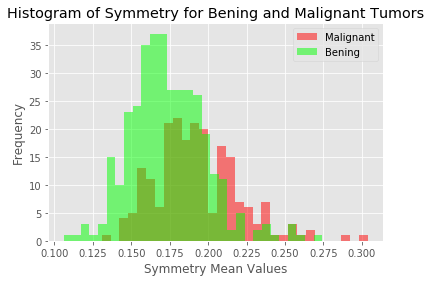

Most frequent malignant symmetry mean is:  0.17698666666666668


In [13]:
m = plt.hist(df[df["diagnosis"] == "M"].symmetry_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].symmetry_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Symmetry Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Symmetry for Bening and Malignant Tumors")
plt.show()
frequent_malignant_symmetry_mean = m[0].max()
index_frequent_malignant_symmetry_mean = list(m[0]).index(frequent_malignant_symmetry_mean)
most_frequent_malignant_symmetry_mean = m[1][index_frequent_malignant_symmetry_mean]
print("Most frequent malignant symmetry mean is: ",most_frequent_malignant_symmetry_mean)

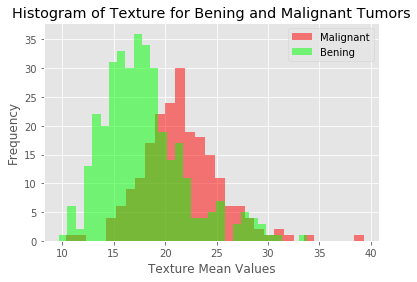

Most frequent malignant texture mean is:  20.976666666666667


In [14]:
m = plt.hist(df[df["diagnosis"] == "M"].texture_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].texture_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Texture Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Texture for Bening and Malignant Tumors")
plt.show()
frequent_malignant_texture_mean = m[0].max()
index_frequent_malignant_texture_mean = list(m[0]).index(frequent_malignant_texture_mean)
most_frequent_malignant_texture_mean = m[1][index_frequent_malignant_texture_mean]
print("Most frequent malignant texture mean is: ",most_frequent_malignant_texture_mean)

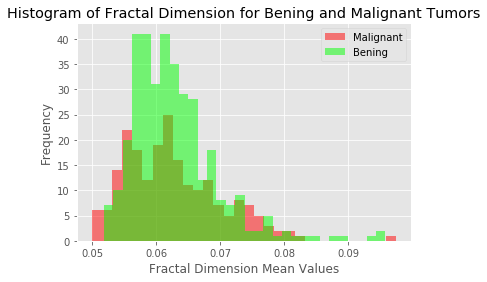

Most frequent malignant fractal dimension mean is:  0.06103866666666667


In [15]:
m = plt.hist(df[df["diagnosis"] == "M"].fractal_dimension_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].fractal_dimension_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Fractal Dimension Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Fractal Dimension for Bening and Malignant Tumors")
plt.show()
frequent_malignant_fractal_dimension_mean = m[0].max()
index_frequent_malignant_fractal_dimension_mean = list(m[0]).index(frequent_malignant_fractal_dimension_mean)
most_frequent_malignant_fractal_dimension_mean = m[1][index_frequent_malignant_fractal_dimension_mean]
print("Most frequent malignant fractal dimension mean is: ",most_frequent_malignant_fractal_dimension_mean)

In [ ]:
df.groupby(['diagnosis','radius_mean']).size().reset_index().head()

In [ ]:
#Calculating the Outliers for the attributes radius mean

In [192]:
df_bening = df[df["diagnosis"] == "B"]
df_malignant = df[df["diagnosis"] == "M"]
desc = df_bening.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
df_bening[df_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ",df_bening[(df_bening.radius_mean < lower_bound) | (df_bening.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.98 16.84 17.85]


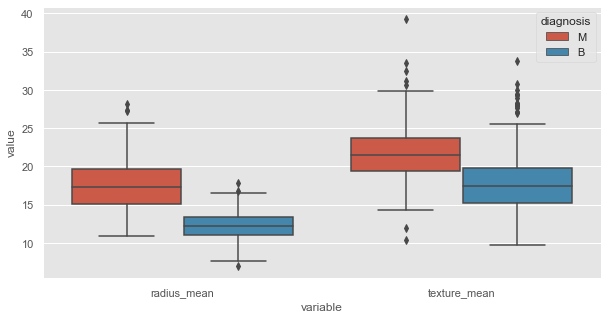

In [193]:
melted_df = pd.melt(df,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (10,5))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_df)
plt.show()


In [194]:
#Summary Statistics 

In [195]:
print("mean: ",df_bening.radius_mean.mean())
print("variance: ",df_bening.radius_mean.var())
print("standart deviation (std): ",df_bening.radius_mean.std())
print("describe method: ",df_bening.radius_mean.describe())

mean:  12.14652380952381
variance:  3.170221722043872
standart deviation (std):  1.7805116461410389
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


In [196]:
#Cummulative Distribution Function

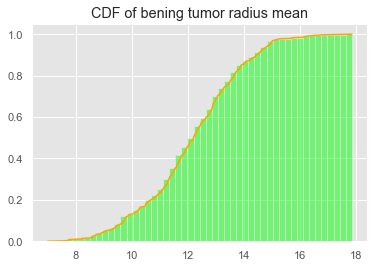

In [197]:
plt.hist(df_bening.radius_mean,bins=50,fc=(0,1,0,0.5),label='Bening',normed = True,cumulative = True)
sorted_data = np.sort(df_bening.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='Orange')
plt.title('CDF of bening tumor radius mean')
plt.show()

In [198]:
#Effect Size

In [199]:
mean_diff = df_malignant.radius_mean.mean() - df_bening.radius_mean.mean()
var_bening = df_bening.radius_mean.var()
var_malignant = df_malignant.radius_mean.var()
var_pooled = (len(df_bening)*var_bening +len(df_malignant)*var_malignant ) / float(len(df_bening)+ len(df_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  2.2048585165041428


In [200]:
#Correlation between all features

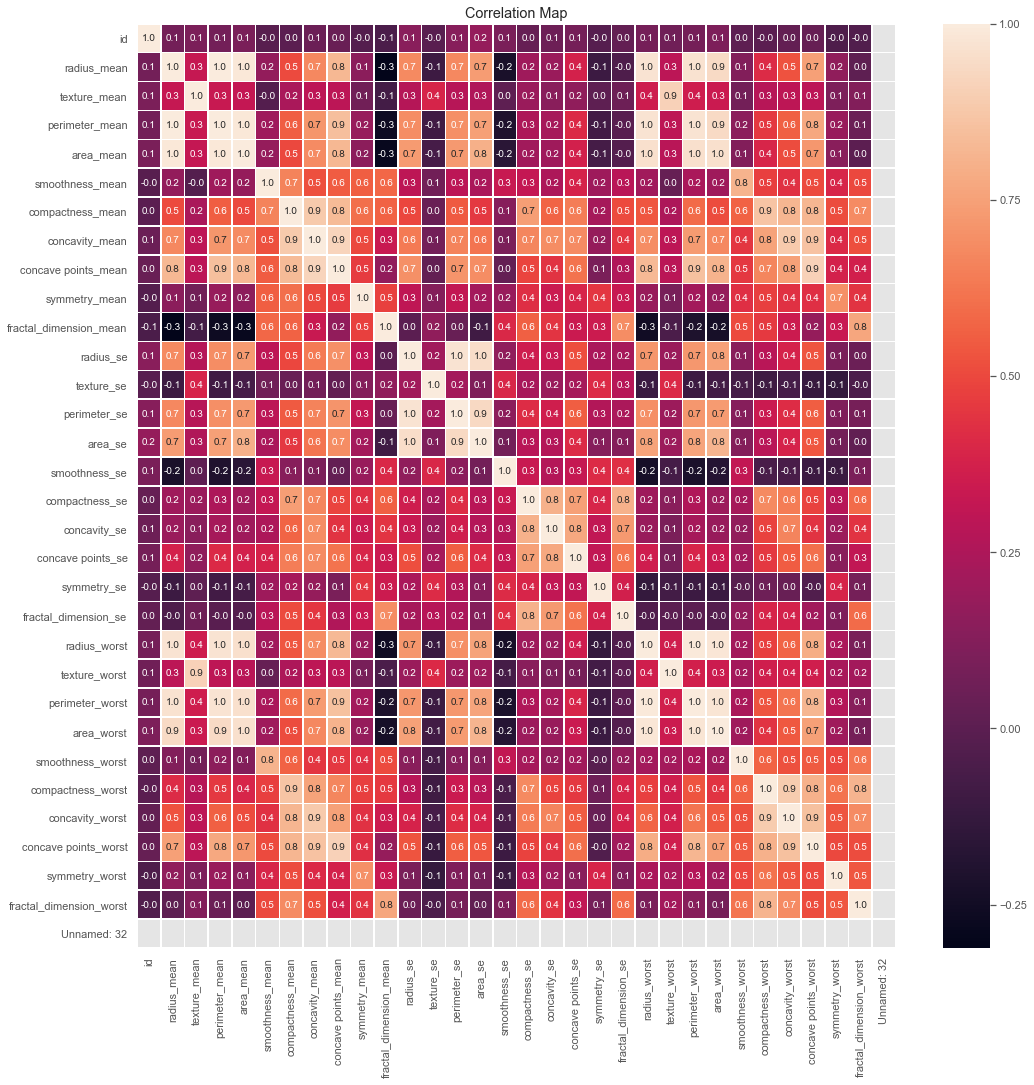

In [201]:
f,ax=plt.subplots(figsize = (17,17))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [202]:
#Using Covariance to show if two features are identical

In [20]:
np.cov(df.radius_mean,df.perimeter_mean)
print("Covariance between radius mean and perimeter mean: ",df.radius_mean.cov(df.perimeter_mean))
print("Covariance between radius mean and fractal dimension se: ",df.radius_mean.cov(df.fractal_dimension_se))

Covariance between radius mean and perimeter mean:  85.44714165573407
Covariance between radius mean and fractal dimension se:  -0.0003976248576440626


In [21]:
#Pearson Correlation

In [22]:
p1 = df.loc[:,["area_mean","perimeter_mean"]].corr(method= "pearson")
p2 = df.perimeter_mean.cov(df.area_mean)/(df.perimeter_mean.std()*df.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
                area_mean  perimeter_mean
area_mean        1.000000        0.986507
perimeter_mean   0.986507        1.000000
Pearson correlation:  0.9865068039913913


In [23]:
#Exploratory Data Analysis 

In [24]:
#Getting the column names of our attributes for the research work

In [25]:
col = df.columns       
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [26]:
#Dropping some uneccessary features that are not good for classification

In [27]:
y = df.diagnosis                      
list = ['Unnamed: 32','id','diagnosis']
x = df.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


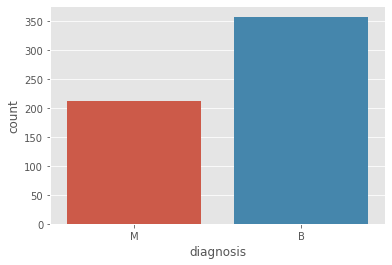

In [28]:
ax = sns.countplot(y,label="Count")       
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [29]:
#Using swarm plot to plot different features and see which features are good for classification 

In [30]:
#Swarm plot1 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

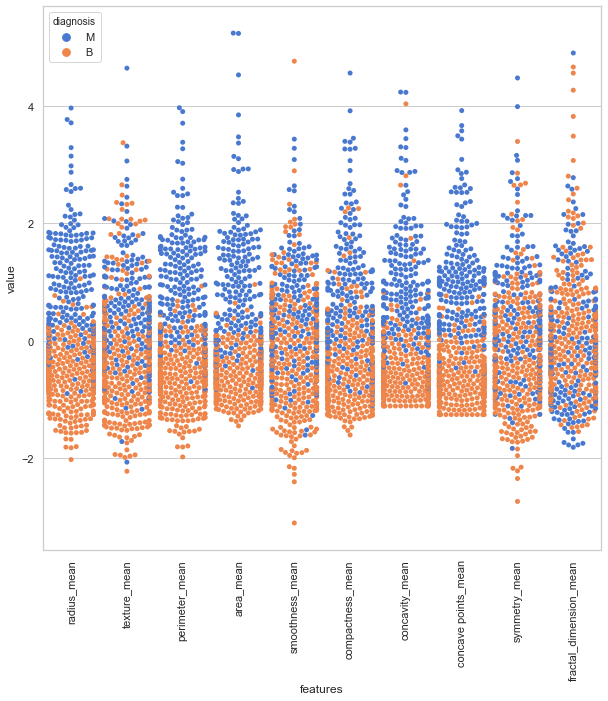

In [31]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

In [32]:
#Swarm Plot2

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

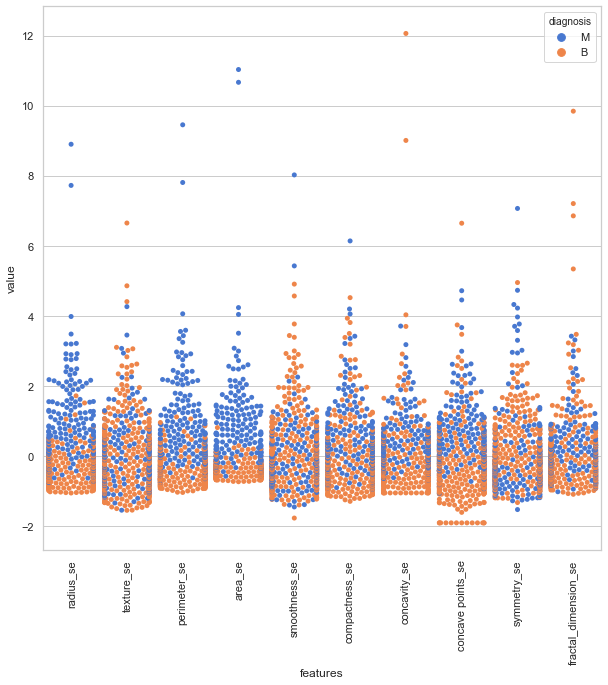

In [33]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

In [34]:
#Swarm Plot3

swarm plot time:  12.266371726989746  s


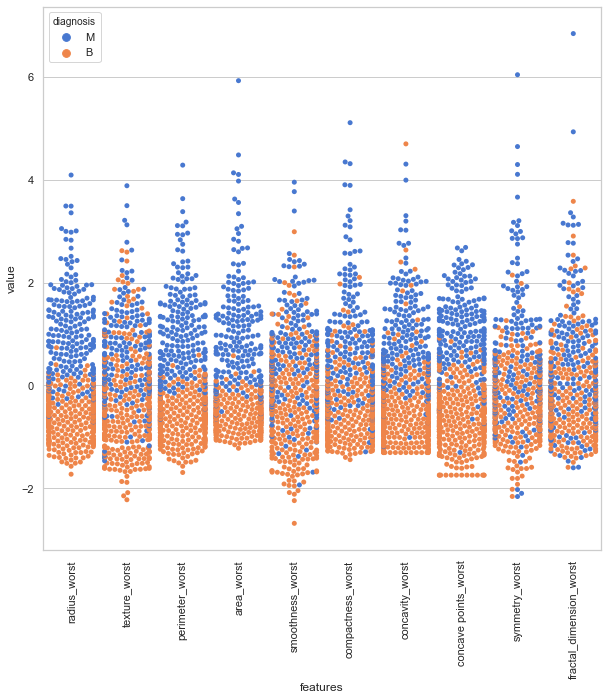

In [35]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

In [36]:
#After using heatmap to check the features that are correlated 
#we now use the swarm plot to check features that are classifiable to use for the RFC
#Also we will drop the other features that we cannot make exact separation among other correlated features

In [37]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [38]:
#Let's build a Random Forest classifier to predict malignant or benign tumors 

Accuracy of Random Forest =   0.9532163742690059


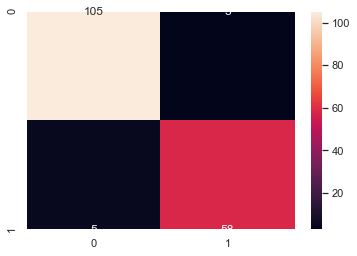

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy of Random Forest =  ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [40]:
#Let's build a SVM to predict malignant or benign tumors

In [41]:
df1 = pd.DataFrame(preprocessing.scale(df.ix[:,2:36]))
df1.columns = (df.ix[:,2:36].columns)
df1['diagnosis'] = df['diagnosis']

In [42]:
X = df1.ix[:,0:30]

y = df1["diagnosis"]
class_names = (y.unique())

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
svc = SVC(kernel = 'linear',C=.1, gamma=10, probability = True)
svc.fit(X,y)
y_pred = svc.fit(X_train, y_train).predict(X_test)
t = pd.DataFrame(svc.predict_proba(X_test))
svc.score(X_train,y_train), svc.score(X_test, y_test)
print("Accuracy of SVM = ",svc.score(X_test, y_test))

Accuracy of SVM =  0.9787234042553191


In [45]:
#Feature extraction using PCA

Text(0.5, 1.0, 'PCA')

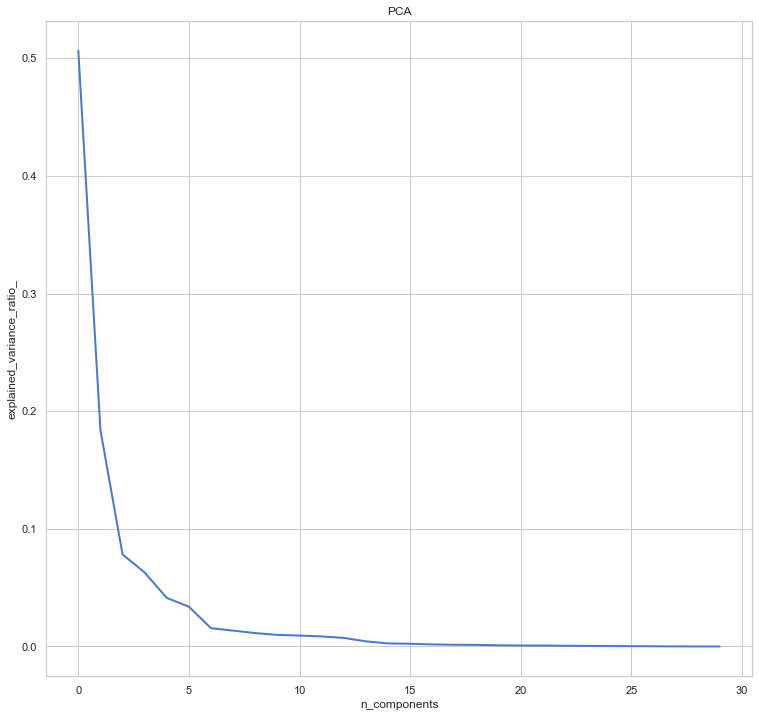

In [65]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.title("PCA")

              precision    recall  f1-score   support

           B       0.97      1.00      0.99       108
           M       1.00      0.95      0.98        63

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Accuracy of SVM with exstracted Features =                precision    recall  f1-score   support

           B       0.97      1.00      0.99       108
           M       1.00      0.95      0.98        63

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



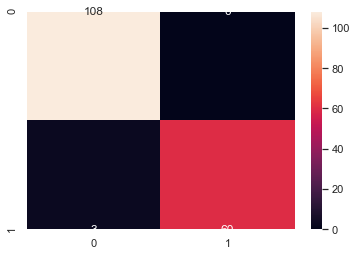

In [64]:
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

pca = PCA()
clf = svm.SVC(kernel='linear')

pca_svm = make_pipeline(pca, clf)

pca_svm.fit(x_train_N, y_train)

y_pred = pca_svm.predict(x_test_N)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
sns.heatmap(cm,annot=True,fmt="d")